## Observations and Insights 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata
# Combine the data into a single dataset use"Mouse Id" as merge point
alldata=pd.merge(mouse_metadata, study_results, on="Mouse ID")
alldata.head()

# Display the data table for preview

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:

# Checking the number of mice.
mice_count=len(alldata['Mouse ID'].unique())
mice_count

249

In [3]:
row_count=len(alldata['Mouse ID'])
row_count

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicates_df=alldata.groupby(['Mouse ID','Timepoint'])
#duplicates_df
#duplicates_df.duplicated(subset((['Mouse ID','Timepoint']))
                         
duplicates=alldata.duplicated(subset=(['Mouse ID','Timepoint']))

#duplicates.loc[True]
duplicate_mouse=alldata.loc[duplicates, 'Mouse ID'].unique()
duplicate_mouse
#df.loc[somearray,columns]

array(['g989'], dtype=object)

In [5]:

# Optional: Get all the data for the duplicate mouse ID. 
alldata.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=alldata.drop(alldata[alldata['Mouse ID']=='g989'].index)
#row_count=len(alldata['Mouse ID'])
row_count=len(clean_data['Mouse ID'])
row_count
#alldata[alldata.('Mouse Id') != 'duplicate_mouse']

1880

In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count=len(clean_data['Mouse ID'].unique())
clean_mice_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimengrp=clean_data.groupby(['Drug Regimen'])
regimen_mean=regimengrp['Tumor Volume (mm3)'].mean()
regimen_median=regimengrp['Tumor Volume (mm3)'].median()
regimen_variance=regimengrp['Tumor Volume (mm3)'].var()
regimen_std=regimengrp['Tumor Volume (mm3)'].std()
regimen_SEM=regimengrp['Tumor Volume (mm3)'].sem()


In [9]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drugstats={
    "Drug Mean": regimen_mean,
    "Drug Mmedian": regimen_median,
    "Drug Variance": regimen_variance,
    "Drug Standard Deviation": regimen_std,
    "Drug SEM": regimen_SEM
    
    }
drugregsummary=pd.DataFrame(drugstats)
drugregsummary

,Drug Mean,Drug Mmedian,Drug Variance,Drug Standard Deviation,Drug SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimengrp2=clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
regimengrp2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

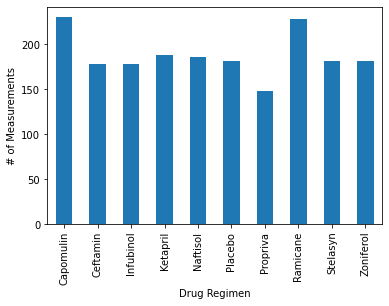

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#The X axis will be the names of the drug Regimen and the y axis will be the # of measurements.
#clean_data.head()

total_measurements=clean_data.groupby(['Drug Regimen']).count()["Timepoint"]
measurements_chart=total_measurements.plot(kind='bar')
measurements_chart.set_ylabel('# of Measurements')
plt.show()


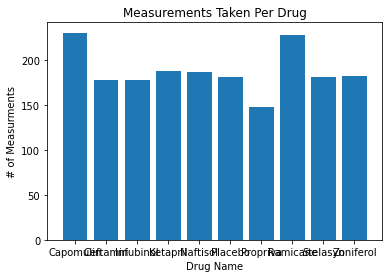

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#plt.plot
x_axis=total_measurements.keys()
plt.bar(x_axis, total_measurements)
plt.title('Measurements Taken Per Drug')
plt.xlabel ('Drug Name')
plt.ylabel('# of Measurments')
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, :)
plt.show()



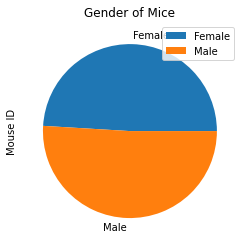

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#The x-axis will be Sex and the Y axis will be the Total of each

count_bygender_df=clean_data.loc[:, ['Mouse ID', 'Sex']].groupby('Sex').count()
count_bygender_df.plot(y='Mouse ID', x='Sex', kind='pie')
plt.title('Gender of Mice')
plt.show()

#gender_count=len(gender_grp)['Mouse ID'].unique()
#gender_count



In [14]:
count_bygender_df

,Mouse ID
Sex,
Female,922
Male,958


<ipython-input-15-9a398ef31b5c>:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(count_bygender_df, labels=count_bygender_df.index)


Text(0.5, 1.0, 'Measurements Taken Per Drug')

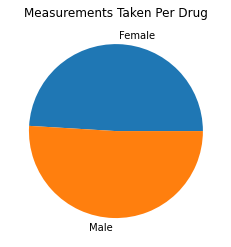

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender=total_measurements.keys()
plt.pie(count_bygender_df, labels=count_bygender_df.index)
plt.title('Measurements Taken Per Drug')


## Quartiles, Outliers and Boxplots

In [16]:
#Kevin did this code in class as an example
#max_timepoint=clean_data.groupby('Mouse ID')['Timepoint'].max()
#pd.merge(max_timepoint, clean_data, on=['Mouse ID', 'Timepoint'])

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

fourdrugs=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

fourdrug_df=clean_data[clean_data['Drug Regimen'].isin(fourdrugs)]
fourdrug_df
# Start by getting the last (greatest) timepoint for each mouse

#use max timepoint for  MouseId
max_timepoint=fourdrug_df.groupby('Mouse ID')['Timepoint'].max()
max_timepoint


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
fourdrug_max=pd.merge(max_timepoint, clean_data, on=('Mouse ID','Timepoint'))
fourdrug_max



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [31]:
# Put treatments into a list for for loop (and later for plot labels)

drug_treatments=[]
drug_treatments=clean_data['Drug Regimen'].unique()
#regimen_SEM=regimengrp['Tumor Volume (mm3)'].sem()
drug_treatments
                           

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

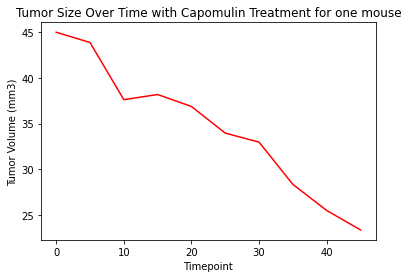

In [46]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin=['Capomulin']

capomulin_df=clean_data[clean_data['Drug Regimen'].isin(capomulin)]
capomulin_df

capomulin_mouse=capomulin_df[capomulin_df['Mouse ID']=='s185']
capomulin_mouse

x_axis_data=capomulin_mouse['Timepoint']
y_axis_data=capomulin_mouse['Tumor Volume (mm3)']
plt.plot(x_axis_data, y_axis_data, color="red", label="Tumor Size")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Size Over Time with Capomulin Treatment for one mouse")


plt.show()
                                     #max_timepoint=fourdrug_df.groupby('Mouse ID')['Timepoint'].max()

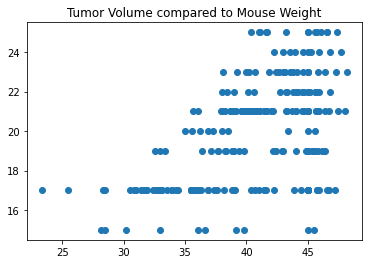

<Figure size 2160x2160 with 0 Axes>

In [51]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#1/16/2021 44:00 example
filter_Capomulin=clean_data.loc[:, 'Drug Regimen']=='Capomulin'
filter_Capomulin
capomulin_df=(clean_data.loc[filter_Capomulin, :])
#print(capomulin_df)

tumor_vol_weight=plt.scatter(x=capomulin_df.loc[:, 'Tumor Volume (mm3)'], y=capomulin_df.loc[:, 'Weight (g)'])

#filter_Capomulin.plt(kind='scatter', x=capomulin_df.loc[:, 'Tumor Volume (mm3)'], y=capomulin_df.loc[:, 'Weight (g)'])

plt.title('Tumor Volume compared to Mouse Weight')
#tumor_vol_weight.set_ylabel()
plt.figure(figsize=(30, 30))
#plt.grid(b=True, which='both')
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
